## refer from..
- https://qiita.com/mshinoda88/items/8bfe0b540b35437296bd


In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=4,
                           n_informative=2, n_redundant=0,
                            random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0,n_estimators=10)
clf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [6]:
print(clf.feature_importances_)
# [ 0.17287856  0.80608704  0.01884792  0.00218648]
print(clf.predict([[0, 0, 0, 0]]))
# [1]

[0.17287856 0.80608704 0.01884792 0.00218648]
[1]


## classification visualize by random forest

In [7]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    #setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    # 最小値, 最大値からエリアの領域を割り出す
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    # resolutionの間隔で区切った領域を定義
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                            np.arange(x2_min, x2_max, resolution))
    # print(xx1.shape)

    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

   # plot all samples
    X_test, y_test = X[test_idx, :], y[test_idx]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='',
            alpha=1.0, linewidth=1, marker='o',
            s=55, label='test set')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


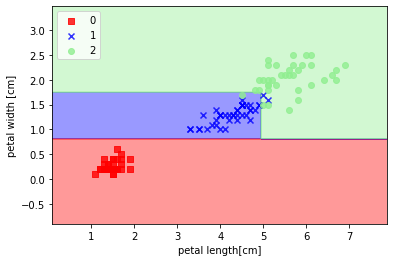

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# データを読み込み
from sklearn.datasets import load_iris
iris = load_iris()
# 説明変数 (それぞれ、がく片や花弁の幅、長さを示します)
# irisのデータセットの第3, 4カラム
x = iris.data[:, [2, 3]]
# 目的変数 (0, 1, 2 がそれぞれの品種を表します)
# irisのそれぞれのデータごとのラベル
y = iris.target

# データセットを訓練データとテストデータに分割
# 今はtest_size=0.3なので訓練データ7割テストデータ3割にしている
# sklearn.model_selection.train_test_split 
#   http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

x_combined = np.vstack((x_train, x_test))
y_combined = np.hstack((y_train, y_test))

# エントロピーを指標とする決定木のインスタンスを生成
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
tree.fit(x_train, y_train)

plot_decision_regions(x_train, y_train, classifier=tree)
plt.xlabel('petal length[cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


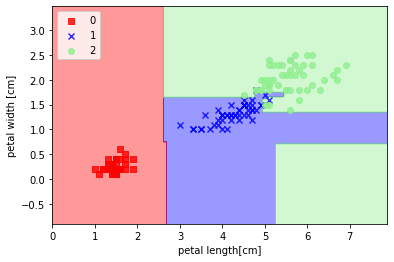

In [11]:
from sklearn.ensemble import RandomForestClassifier

# エントロピーを指標とするランダムフォレストのインスタンス生成
forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=10, random_state=1, n_jobs=2)
# n_jobs=2 -> CPU コアを2つ使用して並列処理
# n_estimators=10 -> 10個の決定木からランダムフォレストをトレーニング
# 

# ランダムフォレストのモデルにトレーニングデータを適合させる
forest.fit(x_train, y_train)
plot_decision_regions(x_combined, y_combined, classifier=forest)
plt.xlabel('petal length[cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()